In [27]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams.update({'font.size':14})

# More fun with functions, dataframes and plotting

## Overview

```{admonition} Objectives
:class: objectives

- Writing functions to manipulate the data
- Using `apply()`
- Making some fancier plots
```

If you've completed all of the last page and come back to this one another time you'll need to start here by reading in the `big_cepheids_table.csv` file into a dataframe. **Note:** This isn't a file for you to download, you need to create it yourself.

If you've carried straight on to this section the `cepheids_df` data frame will already exist.

In [28]:
cepheids_df = pd.read_csv('./data/big_cepheids_table.csv')

In [29]:
cepheids_df

,Star_ID,parallax_mas,logP,mag_B,err_B,mag_V,err_V,mag_I,err_I,E_B_V,A_V
0,XX Cen,0.564,1.040,8.882,0.019,7.855,0.012,6.754,0.008,0.5223,1.6191
1,T Mon,0.733,1.432,7.436,0.022,6.187,0.014,5.005,0.010,0.5997,1.8590
2,TW Nor,0.362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CV Mon,0.602,0.731,11.681,0.015,10.314,0.010,8.653,0.006,1.4373,4.4556
4,RY Sco,0.754,1.308,9.568,0.018,8.037,0.012,6.271,0.008,1.2228,3.7907
...,...,...,...,...,...,...,...,...,...,...,...
62,delta Cep,3.556,0.730,4.684,0.018,3.990,0.012,NaN,NaN,1.4914,4.6233
63,U Aql,1.748,0.847,7.536,0.016,6.457,0.011,5.279,0.007,0.3334,1.0337
64,eta Aql,3.674,0.856,4.744,0.017,3.918,0.011,3.036,0.007,0.1936,0.6001
65,RT Aur,1.841,0.571,6.120,0.017,5.487,0.011,4.822,0.006,0.1844,0.5717


## Finding the distance

`cepheids_df` has the parallax measurement for each star. Parallax is a way to measure distance using trigonometry.

```{image} images/parallax.png
:alt: figure showing how parallax angle relates to distance
:width: 800px
:align: center
```

*Gaia* takes measurements of each star (almost 2 billion stars actually, but I'm not making you look at all of them, not this week anyway...) at different points in the year. It measures the apparent change in position of the nearby stars compared to a background of really distant objects (the angle $\theta$ in the figure). It also knows its own position in the sky, so knows the length of the base of the triangle (2 astronomical units for observations taken six months apart). Because the angles involved are *very* small, the distance to the star in question becomes

$$ d = \dfrac{1}{\varpi}$$

where $d$ is in parsecs and $\varpi$ is the parallax angle ($\varpi = \theta/2$) in arcseconds. The `parallax_mas` column in `cepheids_df` is $\varpi$ in milli-arcseconds ($10^{-3}$ arcseconds).


(ex-parallax-dist)=
```{admonition} Exercise: Calculate the distance to each star
:class: practice

Using the equation for $d$ above, write a function to convert parallax (in milli-arcseconds) to distance (in parsecs). 

Use your function to calculate the distance of each star in `cepheid_df`. Add a new column to the dataframe with a sensible column name that includes the units.

[solution](soln_parallax_dist.ipynb)

```


In [30]:
def parallax_to_distance(parallax_mas):
    parallax_arcsec = parallax_mas * 1e-3
    distance = 1./parallax_arcsec
    return(distance)

In [31]:
cepheids_df['distance_pc'] = parallax_to_distance(cepheids_df['parallax_mas'])

You should end up with your dataframe looking something like this with a new `distance_pc` column:


In [32]:
cepheids_df

,Star_ID,parallax_mas,logP,mag_B,err_B,mag_V,err_V,mag_I,err_I,E_B_V,A_V,distance_pc
0,XX Cen,0.564,1.040,8.882,0.019,7.855,0.012,6.754,0.008,0.5223,1.6191,1773.049645
1,T Mon,0.733,1.432,7.436,0.022,6.187,0.014,5.005,0.010,0.5997,1.8590,1364.256480
2,TW Nor,0.362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2762.430939
3,CV Mon,0.602,0.731,11.681,0.015,10.314,0.010,8.653,0.006,1.4373,4.4556,1661.129568
4,RY Sco,0.754,1.308,9.568,0.018,8.037,0.012,6.271,0.008,1.2228,3.7907,1326.259947
...,...,...,...,...,...,...,...,...,...,...,...,...
62,delta Cep,3.556,0.730,4.684,0.018,3.990,0.012,NaN,NaN,1.4914,4.6233,281.214848
63,U Aql,1.748,0.847,7.536,0.016,6.457,0.011,5.279,0.007,0.3334,1.0337,572.082380
64,eta Aql,3.674,0.856,4.744,0.017,3.918,0.011,3.036,0.007,0.1936,0.6001,272.182907
65,RT Aur,1.841,0.571,6.120,0.017,5.487,0.011,4.822,0.006,0.1844,0.5717,543.183053


## Correcting for reddening and extinction

The dataframe contains two columns that tell us about reddening and extinction:

* `A_V` is the extinction, $A_V$ - this is how much fainter an object appears in the *V* band
* `E_B_V` is the colour excess, $E(B-V)$ - it tells us how much redder the object appears.

The colour excess is defined as 

$$ E(B-V) = A_B - A_V$$

Combining these two pieces of information with some information about dust behaves, we can correct for extinction at any wavelength. The information about how dust interacts with light is contained in a *reddening law*. Reddening law's can get quite complex, but for our purposes we can approximate the reddening law at these wavelengths as

$$ \dfrac{A_{\lambda}}{A_V} = \dfrac{0.7}{ \lambda} - 0.273 $$

where $A_{\lambda}$ is the extinction at wavelength $\lambda$, and $\lambda$ is in microns ($10^{-6} \text{ m}$).

The wavelengths of the three bands we're looking at are 
* $B = 0.445~\mu \text{m}$
* $V = 0.551~\mu \text{m}$
* $I = 0.806~\mu \text{m}$


To correct for extinction, all we have to do is subtract the extinction value from the corresponding magnitude, i.e.

$$ V_0 = V_{app} - A_V $$

where $V_0$ is the corrected V-band magnitude and $V_{app}$ is the apparent V-band magnitude (i.e., the magnitude from our dataframe). The same methodology applies for $B$ and $I$.

(magnitudes go backwards, so subtracting the extinction makes the star brighter)


(ex-calc-extinction)=
```{admonition} Exercise: Calculate the extinction
:class: practice

Write a function that uses the $A_{\lambda}/ A_V$ equation and the wavelengths above, along with the $A_V$ values in the dataframe to calculate the extinction in the $B$ and $I$ bands. 

Use your function to add new $A_B$ and $A_I$ columns to your dataframe. 

[solution](soln_calc_extinction.ipynb)
```



In [33]:
wavelengths = [0.445, 0.806]
## Don't need V as we already know A_V

In [34]:
def extinction(wavelength, A_V):
    A_l_A_V = (0.7 / wavelength) - 0.273
    A_l = A_l_A_V * A_V
    return(A_l)

In [35]:
cepheids_df['A_B'] = extinction(wavelengths[0], cepheids_df['A_V'])
cepheids_df['A_I'] = extinction(wavelengths[1], cepheids_df['A_V'])



You can check your function has worked as expected by comparing your results to the table below:

In [36]:
cepheids_df.head()

,Star_ID,parallax_mas,logP,mag_B,err_B,mag_V,err_V,mag_I,err_I,E_B_V,A_V,distance_pc,A_B,A_I
0,XX Cen,0.564,1.040,8.882,0.019,7.855,0.012,6.754,0.008,0.5223,1.6191,1773.049645,2.104885,0.964152
1,T Mon,0.733,1.432,7.436,0.022,6.187,0.014,5.005,0.010,0.5997,1.8590,1364.256480,2.416763,1.107009
2,TW Nor,0.362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2762.430939,NaN,NaN
3,CV Mon,0.602,0.731,11.681,0.015,10.314,0.010,8.653,0.006,1.4373,4.4556,1661.129568,5.792430,2.653249
4,RY Sco,0.754,1.308,9.568,0.018,8.037,0.012,6.271,0.008,1.2228,3.7907,1326.259947,4.928038,2.257310


## Find the absolute magnitude

We now have all the ingredients we need to find the absolute magnitude of each star. 

The absolute magnitude in the $V$ band, $M_V$, is given by

$$ M_V = V_{app} - A_V - \mu$$
and similar for the $B$ and $I$ bands.

$\mu$ is the distance modulus, defined as

$$\mu = 5 \log_{10} d - 5 $$

First we can define a function to calculate the distance modulus:

In [37]:
def dist_mod(distance):
    mu = 5.*np.log10(distance) - 5.
    return(mu)

We can define another function to calculate the absolute magnitude:

In [38]:
def abs_mag(app_mag, extinction, mu):
    absolute_mag = app_mag - extinction - mu
    return(absolute_mag)

Now we're going to use the `apply` function in `pandas` to calcuate the absolute magnitudes.

## `apply` will make your life easier

`apply` makes it easier to do more complex calculations on dataframes. 
One of the key parts of `apply` is the `lambda` parameter. Defining
```py
apply(lambda x: ...)
```
means we can now refer to the dataframe just as `x`. This makes things much easier when we've got a lot of things to include. 

The other option you'll see when we use apply is

```py
axis=1
```

This tells `apply` to work on the dataframe one row at a time. (If you're feeling brave, try switching it to `axis=0` and see what happens.)

We can now combine the functions to find the absolute magnitudes:

In [39]:
cepheids_df['V_abs'] = cepheids_df.apply(lambda x: abs_mag(x.mag_V, x.A_V, dist_mod(x.distance_pc)), axis=1)

In [40]:
cepheids_df

,Star_ID,parallax_mas,logP,mag_B,err_B,mag_V,err_V,mag_I,err_I,E_B_V,A_V,distance_pc,A_B,A_I,V_abs
0,XX Cen,0.564,1.040,8.882,0.019,7.855,0.012,6.754,0.008,0.5223,1.6191,1773.049645,2.104885,0.964152,-5.007704
1,T Mon,0.733,1.432,7.436,0.022,6.187,0.014,5.005,0.010,0.5997,1.8590,1364.256480,2.416763,1.107009,-6.346480
2,TW Nor,0.362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2762.430939,NaN,NaN,NaN
3,CV Mon,0.602,0.731,11.681,0.015,10.314,0.010,8.653,0.006,1.4373,4.4556,1661.129568,5.792430,2.653249,-5.243618
4,RY Sco,0.754,1.308,9.568,0.018,8.037,0.012,6.271,0.008,1.2228,3.7907,1326.259947,4.928038,2.257310,-6.366843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,delta Cep,3.556,0.730,4.684,0.018,3.990,0.012,NaN,NaN,1.4914,4.6233,281.214848,6.010446,2.753112,-7.878491
63,U Aql,1.748,0.847,7.536,0.016,6.457,0.011,5.279,0.007,0.3334,1.0337,572.082380,1.343845,0.615554,-3.363993
64,eta Aql,3.674,0.856,4.744,0.017,3.918,0.011,3.036,0.007,0.1936,0.6001,272.182907,0.780150,0.357351,-3.856404
65,RT Aur,1.841,0.571,6.120,0.017,5.487,0.011,4.822,0.006,0.1844,0.5717,543.183053,0.743229,0.340440,-3.759431


In [41]:
cepheids_df.to_csv('./data/before_apply.csv', index=False, header=True)

Notice in the `apply` call above, we're creating a new column not just by running a function, but calling another function within that function. Doing all that while writing out the full dataframe name every time is just asking for mistakes. 

There's lots of other uses for `apply` that you can read more about [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html). For now we'll stick with the simple case.



(ex-apply)=
```{admonition} Exercise: Use apply to find the $B$ and $I$ absolute magnitudes
:class: practice

Use the `apply` method shown above to calculate the $B$ and $I$ absolute magnitudes for each star. Add them as new columns to the dataframe.

[solution](soln_apply.ipynb)
```

In [42]:
cepheids_df['B_abs'] = cepheids_df.apply(lambda x: abs_mag(x.mag_B, x.A_B, dist_mod(x.distance_pc)), axis=1)
cepheids_df['I_abs'] = cepheids_df.apply(lambda x: abs_mag(x.mag_I, x.A_I, dist_mod(x.distance_pc)), axis=1)

Your dataframe should now have 67 rows and 17 columns:


In [43]:
cepheids_df.columns

Index(['Star_ID', 'parallax_mas', 'logP', 'mag_B', 'err_B', 'mag_V', 'err_V',
       'mag_I', 'err_I', 'E_B_V', 'A_V', 'distance_pc', 'A_B', 'A_I', 'V_abs',
       'B_abs', 'I_abs'],
      dtype='object')

In [44]:
cepheids_df.shape

(67, 17)

## Fancy plotting

Our final task is to make a nice plot of the period-luminosity relation. When we did this with the Magellanic Clouds data before we were assuming all the stars were at the same distance. This time we've corrected for distance, so we'll be looking at the absolute magnitudes.

We can just make a quick plot:

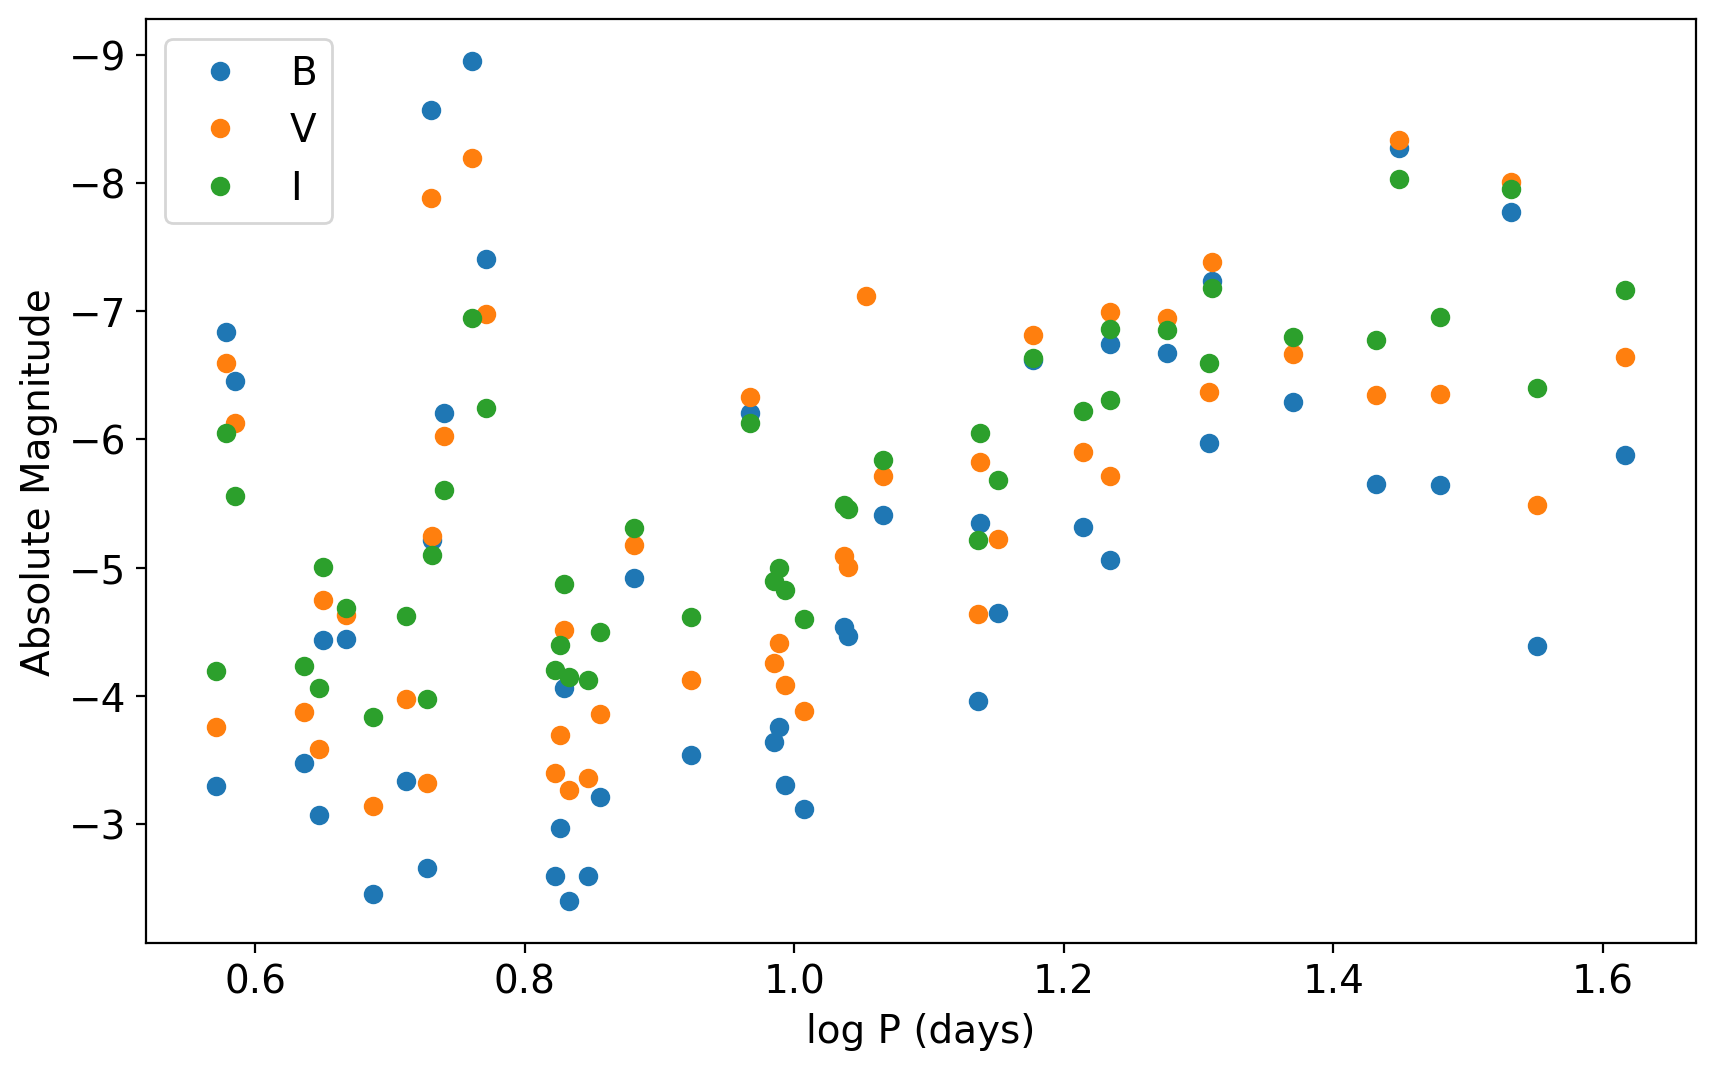

In [45]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cepheids_df['logP'], cepheids_df['B_abs'], 'o', label='B')
ax.plot(cepheids_df['logP'], cepheids_df['V_abs'], 'o', label='V')
ax.plot(cepheids_df['logP'], cepheids_df['I_abs'], 'o', label='I')
ax.set_xlabel('log P (days)')
ax.set_ylabel('Absolute Magnitude')
ax.invert_yaxis()
ax.legend()
plt.show()

That doesn't look very nice. It doesn't look how I expect it to. Let's look at just one set of data for now -- the $I$ band data

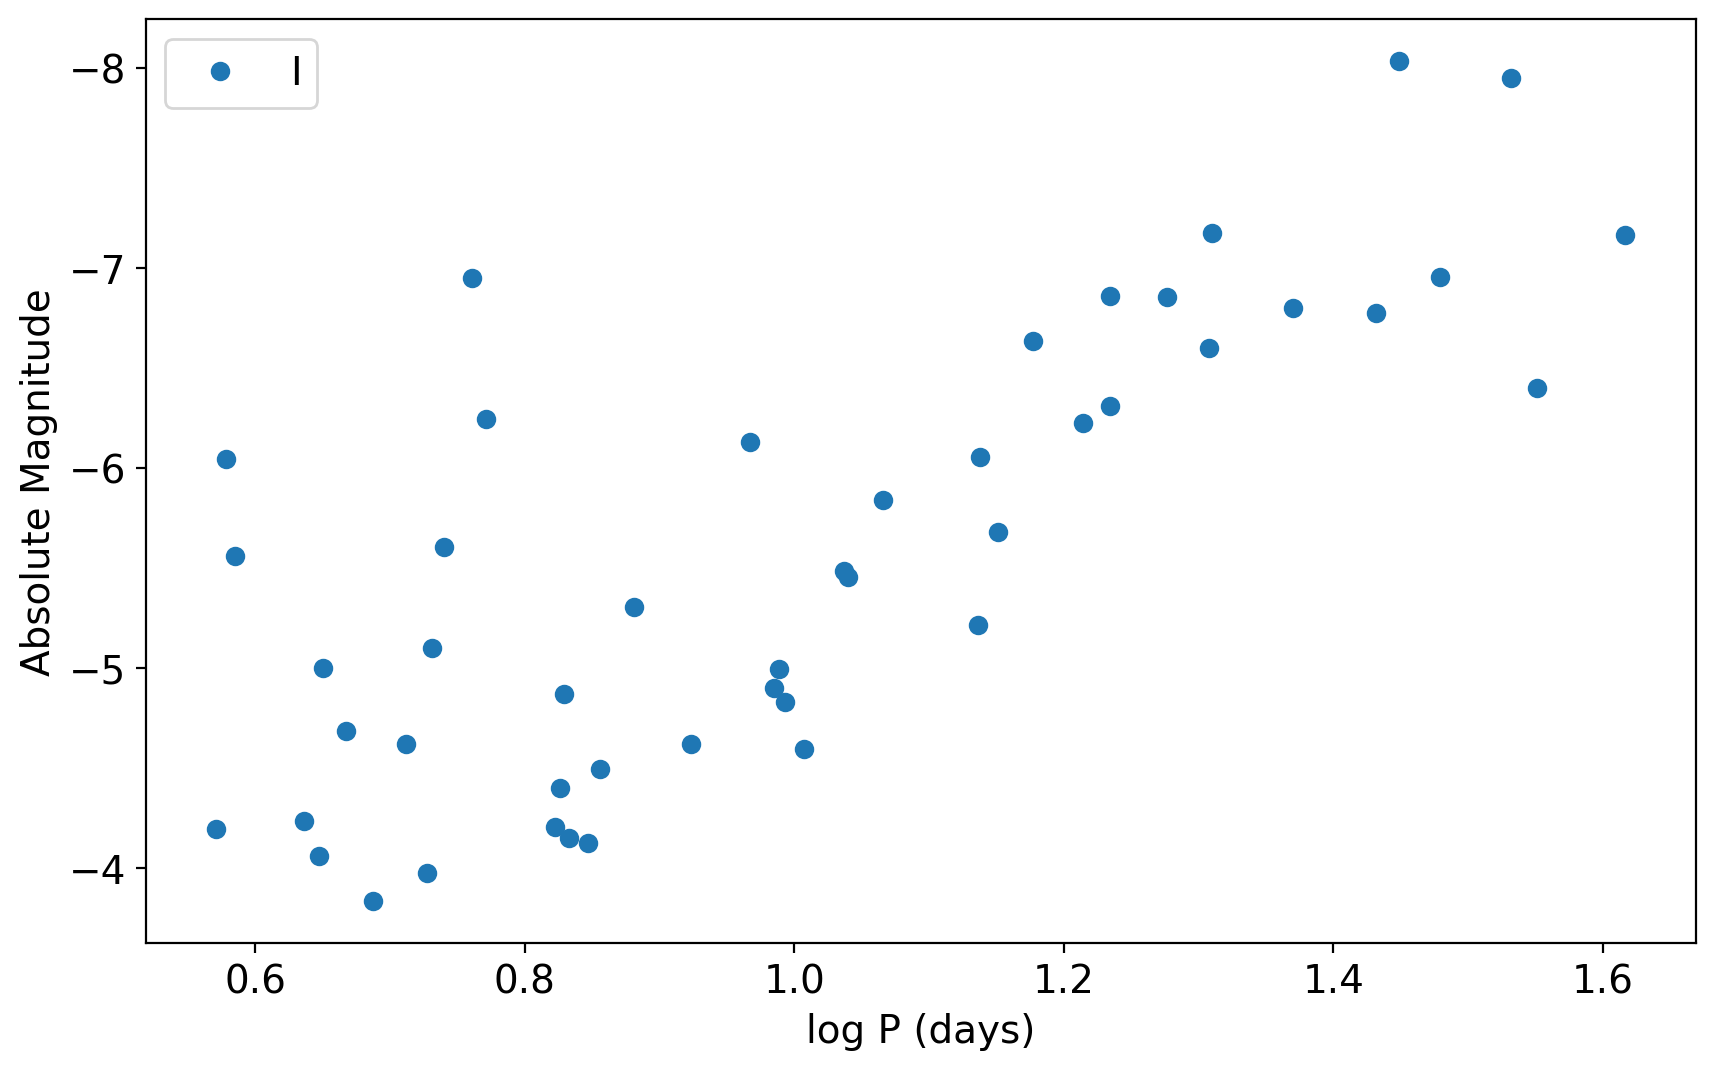

In [46]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cepheids_df['logP'], cepheids_df['I_abs'], 'o', label='I')
ax.set_xlabel('log P (days)')
ax.set_ylabel('Absolute Magnitude')
ax.invert_yaxis()
ax.legend()
plt.show()

There's a lot more data in our dataframe than we're showing here. Perhaps something else is affecting the absolute magnitudes? My first guess is that it's extinction. We can look at this by colour coding the points using `plt.scatter()`. 

First we need to choose a colour map - this is done with `plt.colormaps`. You can see all the available colour maps [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html). I'm using the `plasma` colour map as it's a"perceptually uniform sequential" map - this means that a colour-blind person (or someone with a black and white printer) would still be able to interpret the colour scale.

We also need to have a colour bar so we can translate the colours into actual numbers when we look at the plot. We do this in two steps. First:
```py
sc = ax.scatter(....
```
assigns the output of `ax.scatter` to the variable `sc`.

Then 
```py
cbar = plt.colorbar(sc)
``` 
makes the colour bar that corresponds to our data.

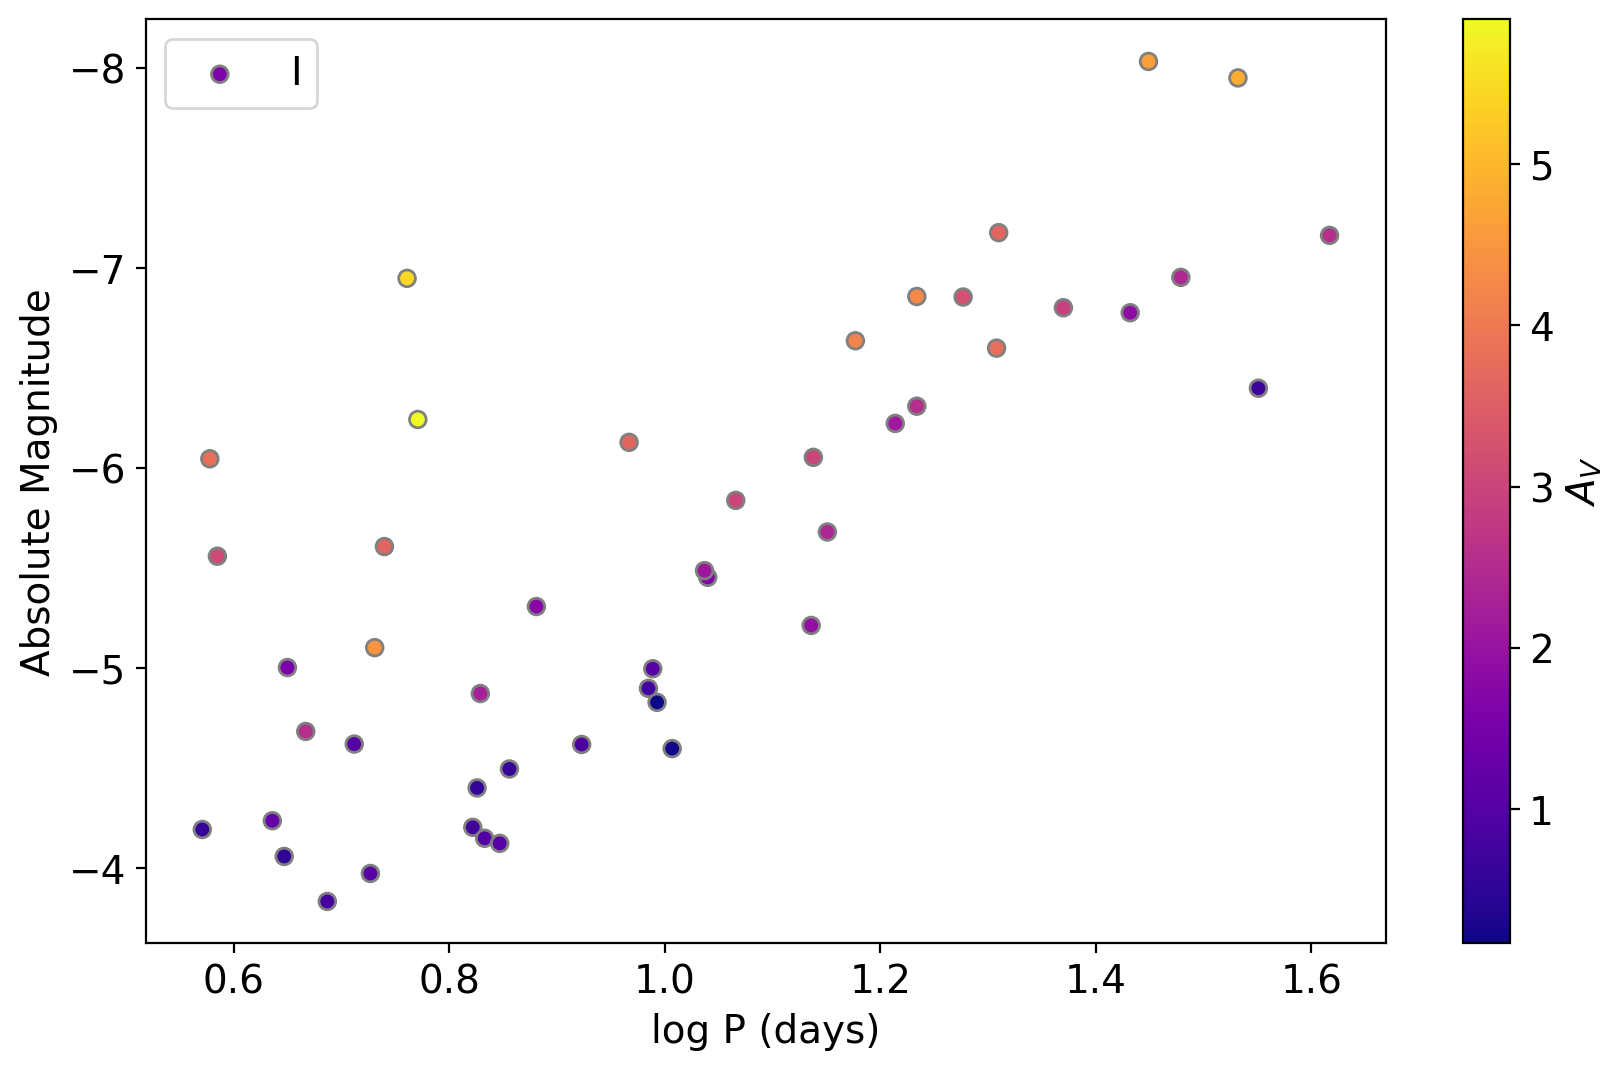

In [50]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
cm = plt.colormaps['plasma']
sc = ax.scatter(cepheids_df['logP'], cepheids_df['I_abs'], c=cepheids_df['A_V'], marker='o', label='I', cmap=cm, edgecolor='Grey')

ax.set_xlabel('log P (days)')
ax.set_ylabel('Absolute Magnitude')
ax.invert_yaxis()
ax.legend()

cbar = plt.colorbar(sc)
cbar.set_label('$A_V$')
plt.show()

Now we can see that the stars that had a larger extinction correction (the red and yellow points) seem to lie further away from the trend than the blue points.

```{admonition} Exercise: Make some fancy plots
:class: practice

Make similar plots to the one above, colour coding the points according to the different extinctions, the distances, or even the colour of the star (colour is the difference between two magnitudes, like $(B-V)$). 

Make all the combinations you can think of! Do any of them look significant? 

Make sure your plots have appropriate axis labels, units, etc, and write some markdown to explain what they are and any trends that they show. 

Save your plots with `savefig()`

```

(ex-save-data)=
```{admonition} Exercise: Save your data!
:class: practice

Finally, save your big dataframe. Be careful not to overwrite the original file, so give it a sensible filename so you will know what it is when you come back to it another day.

```

In [48]:
cepheids_df.to_csv('./data/big_cepheids_file_with_extinctions_and_distances_and_whathaveyou.csv', index=False, float_format='%.4f', na_rep='NaN')

## Key Points
- Use `apply` to do fancy things with dataframes
- Use `plt.scatter` and colourmaps to look at your data in multiple dimensions
- **Always** save your data. In a sensible place. With a sensible filename